In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def convolution(image,kernel):
    img=image.copy()
    img=img.astype(np.float64)
    kernel= kernel.astype(np.float64)
    output_img = np.zeros(img.shape)
    for i in range(int(kernel.shape[0]/2),image.shape[0]-int((kernel.shape[0]-1)/2)):
        for j in range(int(kernel.shape[1]/2),image.shape[1]-int((kernel.shape[1]-1)/2)):
            output_img[i][j]=sum(sum(kernel* img[i-int(kernel.shape[0]/2) : i+1+int((kernel.shape[0]-1)/2),j-int(kernel.shape[1]/2):j+1+int((kernel.shape[1]-1)/2)]))
            #checking bounds
            output_img[i][j] = min(255,output_img[i][j])
            output_img[i][j] = max(0,output_img[i][j])
    output_img = output_img.astype(np.uint8)
    return output_img

In [3]:
def gaussfilter(image,sigma,size):
    img=image.copy()
    n = size // 2
    values = np.zeros((size, size), dtype=tuple)
    for x in range(0, 2*n+1):
      for y in range(0, 2*n+1):
        values[x,y] = (x-n,y-n)
    kernel = np.zeros((size, size))
    for r in range(size):
        for c in range(size):
              x,y = values[r][c] 
              kernel[r][c] = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2 + y**2)/(2* sigma**2))
    outputimg=convolution(img,kernel)
    return outputimg

In [4]:
sizes = [3,5,7,9]

# Unsharp masking

In [5]:
def unsharp_masking(image,diff,size,sigma):
    img=image.copy()
    img2 = gaussfilter(img,sigma,size)
    output_img= img+(img-img2)*diff
    return output_img.astype(np.uint8)

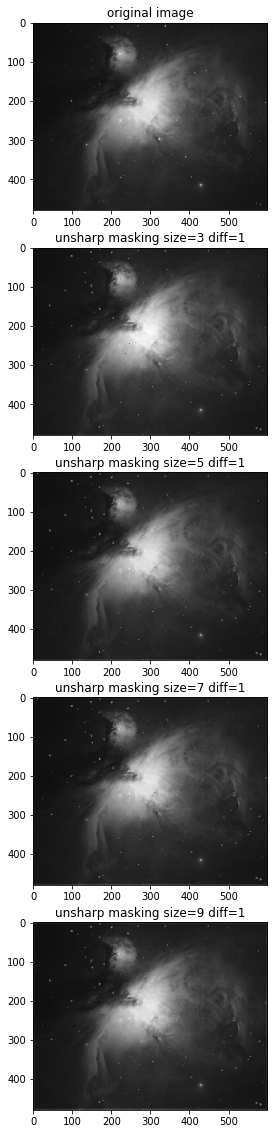

In [6]:
img = cv2.imread('../images/orion.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(40,20))
plt.subplot(1+len(sizes),1,1)
k=2
plt.imshow(img,cmap='gray')
plt.title('original image')
for i in sizes:
    output_img1 = unsharp_masking(img,1,i,0.78)
    plt.subplot(1+len(sizes),1,k)
    k=k+1
    plt.imshow(output_img1,cmap='gray')
    plt.title('unsharp masking'+' size='+str(i)+' diff=1')

# High boost filtering

In [7]:
def highboost(image,diff,size,sigma):
    img=image.copy()
    img2 = gaussfilter(img,sigma,size)
    output_img= (size+1)*img-size*img2
    return output_img.astype(np.uint8)

Text(0.5, 1.0, 'highboost filtering  size=5 coeff=1')

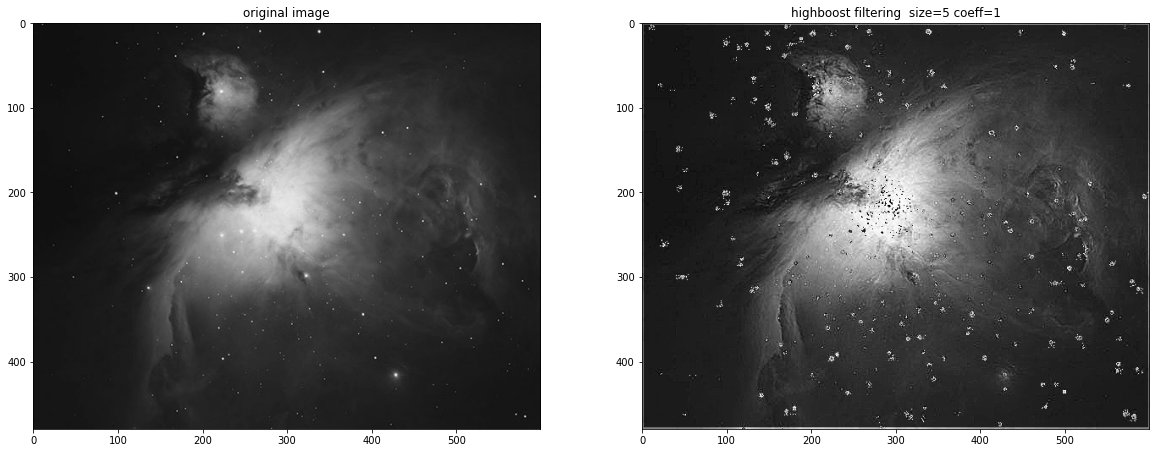

In [8]:
img = cv2.imread('../images/orion.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('original image')
coeff=1
output_img1 = highboost(img,2,5,coeff)
plt.subplot(1,2,2)

plt.imshow(output_img1,cmap='gray')
plt.title('highboost filtering '+' size=5 '+'coeff='+str(coeff))

Text(0.5, 1.0, 'highboost filtering  size=5 coeff=0.5')

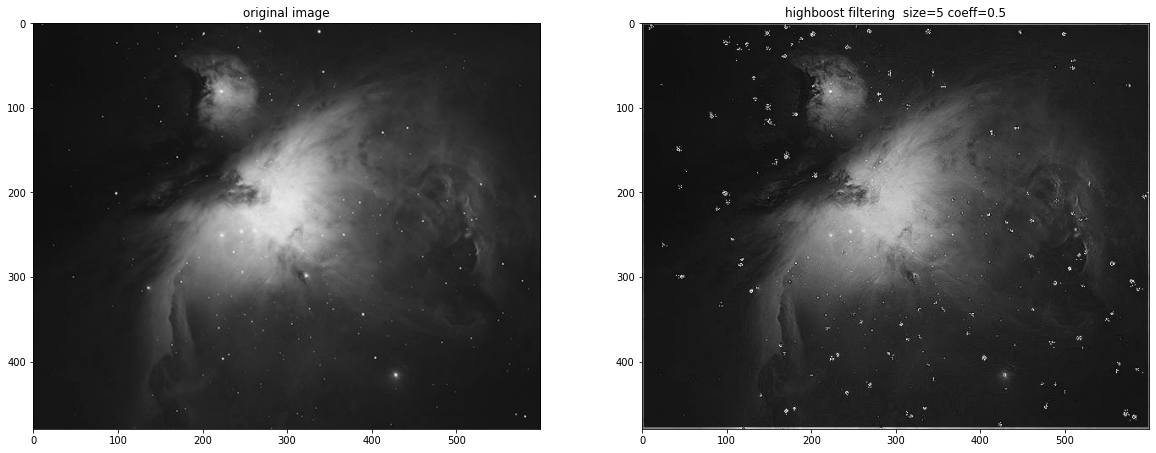

In [9]:
img = cv2.imread('../images/orion.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('original image')
coeff=0.5
output_img1 = highboost(img,2,5,coeff)
plt.subplot(1,2,2)

plt.imshow(output_img1,cmap='gray')
plt.title('highboost filtering '+' size=5 '+'coeff='+str(coeff))

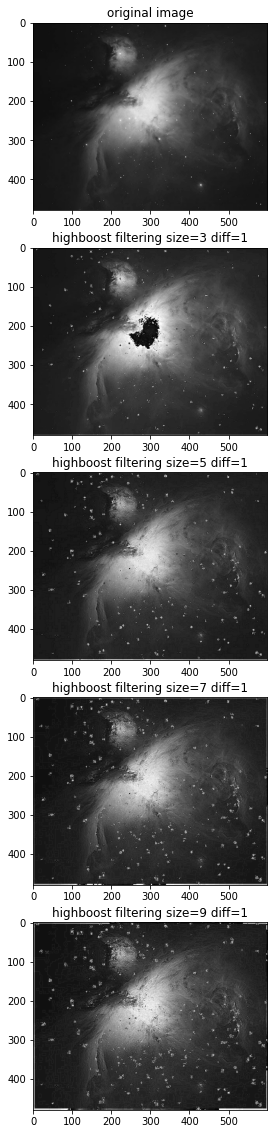

In [10]:
img = cv2.imread('../images/orion.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(40,20))
plt.subplot(1+len(sizes),1,1)
k=2
plt.imshow(img,cmap='gray')
plt.title('original image')
for i in sizes:
    output_img1 = highboost(img,1,i,0.78)
    plt.subplot(1+len(sizes),1,k)
    k=k+1
    plt.imshow(output_img1,cmap='gray')
    plt.title('highboost filtering'+' size='+str(i)+' diff=1')

# Observations

As the value of coeff of edge mask in high boost filtering increases, the contribution of the sharpening process becomes less and less important. If the coeff is very large it will be almost equal to const`*`original image. We can see for same coeff and filtersize high boost filtering even small high frequency components get more so creating a sharper image